**Gráfico Forest Plot Simplificado - GERAL**

In [80]:

import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import sqrt
from scipy.stats import norm

# Criar diretório para os gráficos
output_dir = "graficos_python_herman"
os.makedirs(output_dir, exist_ok=True)

# Dados originais
fscore = [
    0.868, 0.69, 0.93, 0.97, 0.9296, 0.9269, 0.926, 0.85, 0.96, 0.87,
    0.886, 0.845, 0.81, 0.875, 0.929, 0.8093, 0.925, 0.932, 0.805, 0.91,
    0.9821, 0.9831, 0.975, 0.875, 0.88, 0.875, 0.92, 0.948, 0.789, 0.6483,
    0.6297, 0.6806, 0.7047, 0.8685, 0.9421, 0.8685, 0.9093, 0.7994, 0.879, 0.8038,
    0.989, 0.94, 0.917, 0.883, 0.948, 0.692, 0.765, 0.498, 0.9765, 0.9443,
    0.75, 0.992, 0.985, 0.985, 0.993, 0.986, 0.961, 0.949, 0.937, 0.8823,
    0.9701, 0.9446, 0.7487, 0.989, 0.991, 0.963, 0.92, 0.96, 0.94, 0.976,
    0.96, 0.97, 0.956
]

se_fscore = [
    0.003089984, 0.001573434, 0.000568258, 0.015572412, 0.002558199, 0.00085412, 0.000523542,
    0.001030776, 0.007406561, 0.005254741, 0.000126547, 0.000144104, 0.000156207, 0.000131686,
    0.000102263, 0.00124231, 0.000324117, 0.007103422, 0.000317704, 0.003694591, 0.000494126,
    0.000434511, 0.000390312, 0.000826797, 0.000812404, 0.000826797, 0.000678233, 0.000555068,
    0.001290267, 0.00150999, 0.001527016, 0.001474394, 0.00144256, 0.00106868, 0.000738563,
    0.00106868, 0.008763046, 0.012219274, 0.009951418, 0.012117733, 0.000994485, 0.002264348,
    0.002630434, 0.003064622, 0.001496906, 0.003112555, 0.002858599, 0.003370972, 0.000162972,
    0.000246732, 0.000465847, 0.000363685, 0.000496236, 0.000496236, 0.000340367, 0.000479653,
    0.0060826, 0.006912155, 0.007633705, 0.00198785, 0.016946623, 0.022762406, 0.043160799,
    0.001028222, 0.000931002, 0.001860828, 0.0060663, 0.00438178, 0.005310367, 0.006586181,
    0.00843274, 0.007340905, 0.008825888
]

key = [
    "RNN", "ANFIS", "K-means", "KNN", "CNN", "Random Forest", "KNN", "Random Forest", "CNN", "CAE",
    "CNN", "SVM", "KNN", "DNN", "HWCSS", "CNN+LSTM", "RBFNN-MOGA", "CNN+KNN", "Clustering Fuzzy", "SVM",
    "SVDT-KNN-MLP", "SVDT-KNN-MLP", "RBFNN-MOGA", "SVM", "KNN", "Decision Tree", "LSTM", "CNN", "CNN+LSTM", "DAE",
    "RNN", "LSTM", "CNN", "DAE+LSTM", "CNN", "CNN", "KNN+RF+CNN", "Random Forest", "CNN", "KNN",
    "CNN", "KNN", "XGBoost", "SVM", "CNN", "KNN", "XGBoost", "SVM", "Bagged Trees", "KNN",
    "Boosted Trees", "Decision Tree", "KNN", "KNN", "AdaBoost", "SVM", "Bayes Network", "Rotational Forest",
    "Random Forest", "Random Forest", "Bagged Trees", "KNN", "Boosted Trees", "KNN", "Random Forest",
    "SVM", "Decision Tree", "Random Forest", "SVM", "LE-CRNN", "CNN", "LE-CRNN", "CNN"
]

id = [
    "[7]", "[8]", "[9]", "[10]", "[11]", "[12]", "[13]", "[14]", "[15]", "[16]",
    "[17]", "[17]", "[17]", "[17]", "[17]", "[18]", "[19]", "[20]", "[21]", "[22]", "[23]", "[23]",
    "[24]", "[24]", "[24]", "[24]", "[24]", "[24]", "[25]", "[25]", "[25]", "[25]", "[25]", "[25]",
    "[26]", "[26]", "[27]", "[27]", "[27]", "[27]", "[28]", "[28]", "[28]", "[28]", "[28]", "[28]", "[28]", "[28]",
    "[29]", "[29]", "[29]", "[30]", "[30]", "[30]", "[30]", "[30]",
    "[31]", "[31]", "[31]", "[32]",
    "[33]", "[33]", "[33]",
    "[34]", "[34]", "[34]",
    "[35]", "[35]", "[35]",
    "[36]", "[36]", "[36]", "[36]"
]


# Agrupar dados por técnica
def agrupar_por_tecnica(estimativas, erros, tecnicas, ids):
    df = pd.DataFrame({
        'est': estimativas,
        'se': erros,
        'tecnica': tecnicas,
        'id': ids
    })
    
    # Agrupar por técnica e calcular média e erro padrão combinado
    grouped = df.groupby('tecnica').apply(lambda x: pd.Series({
        'est': np.mean(x['est']),
        'se': np.sqrt(np.sum(x['se']**2)) / len(x),
        'count': len(x),
        'ids': ', '.join(sorted(set(x['id'])))
    })).reset_index()
    
    return grouped

# Criar DataFrame agrupado
dados_agrupados = agrupar_por_tecnica(fscore, se_fscore, key, id)

# Ordenar por estimativa (opcional)
dados_agrupados = dados_agrupados.sort_values(by='est', ascending = False)

# Adicionar labels com contagem quando houver mais de um estudo
dados_agrupados['label'] = dados_agrupados.apply(
    lambda x: f"{x['tecnica']} (n={x['count']}) - {x['ids']}" if x['count'] > 1 else f"{x['tecnica']} - {x['ids']}", axis=1
)

# Função para calcular o tau² (efeito aleatório)
def calcular_tau2_dl(eff, var_eff):
    k = len(eff)
    if k <= 1:
        return 0
    weights_fixed = 1.0 / var_eff
    mean_eff_fixed = np.sum(weights_fixed * eff) / np.sum(weights_fixed)
    Q = np.sum(weights_fixed * (eff - mean_eff_fixed)**2)
    C = np.sum(weights_fixed) - np.sum(weights_fixed**2) / np.sum(weights_fixed)
    tau2 = max(0, (Q - (k - 1)) / C)
    return tau2

# Meta-análise aleatória DerSimonian-Laird
def realizar_metaanalise_aleatoria_dl(dados):
    estimativas = dados['est'].values
    variancias = (dados['se'].values)**2
    tau2 = calcular_tau2_dl(estimativas, variancias)
    variancia_total = variancias + tau2
    pesos_aleatorios = 1.0 / variancia_total
    efeito_combinado = np.sum(pesos_aleatorios * estimativas) / np.sum(pesos_aleatorios)
    variancia_combinada = 1.0 / np.sum(pesos_aleatorios)
    erro_padrao_combinado = sqrt(variancia_combinada)
    intervalo_confianca = (efeito_combinado - 1.96 * erro_padrao_combinado,
                           efeito_combinado + 1.96 * erro_padrao_combinado)
    return efeito_combinado, erro_padrao_combinado, intervalo_confianca, tau2

# Função para gerar gráfico de floresta com novos labels
def gerar_grafico_floresta(dados, efeito_combinado, erro_padrao_combinado, ic_combinado, tau2, titulo, filename):
    estimativas = dados['est'].values
    erros_padrao = dados['se'].values
    labels = dados['label'].values
    n_estudos = len(estimativas)
    y_pos = np.arange(n_estudos)

    fig, ax = plt.subplots(figsize=(10, max(6, n_estudos * 0.4)))  # Ajuste dinâmico da altura
    
    # Plotar intervalos de confiança individuais
    ax.errorbar(estimativas, y_pos, xerr=1.96 * erros_padrao, fmt='o', color='black', 
                capsize=5, markersize=5, linewidth=1)
    
    # Plotar pontos das estimativas
    ax.scatter(estimativas, y_pos, color='blue', s=50, zorder=3)
    
    # Linha do efeito combinado
    ax.axvline(efeito_combinado, color='red', linestyle='--', linewidth=2,
               label=f'Efeito Combinado (DL): {efeito_combinado:.4f} (IC 95%: [{ic_combinado[0]:.4f}, {ic_combinado[1]:.4f}]), τ² = {tau2:.4f}')
    
    # Área do intervalo de confiança combinado
    ax.fill_betweenx([-1, n_estudos], ic_combinado[0], ic_combinado[1], color='lightcoral', alpha=0.2)

    # Configurações do eixo Y
    ax.set_yticks(y_pos)
    ax.set_yticklabels(labels)
    ax.invert_yaxis()  # Inverter para ter o maior no topo
    
    # Configurações gerais
    ax.set_xlabel('F-score')
    ax.set_title(titulo)
    ax.legend(loc='lower left')
    ax.grid(axis='x', linestyle='--', alpha=0.6)
    
    # Ajustar layout
    plt.tight_layout()

    # Salvar figura
    path = os.path.join(output_dir, filename)
    plt.savefig(path, dpi=300, bbox_inches='tight')
    plt.close()

# Análise completa para cada métrica
def analisar_metrica(dados, nome_metrica):
    efeito_combinado, erro_padrao_combinado, ic_combinado, tau2 = realizar_metaanalise_aleatoria_dl(dados)
    gerar_grafico_floresta(dados, efeito_combinado, erro_padrao_combinado, ic_combinado, tau2,
                           f'Gráfico de Floresta - {nome_metrica.capitalize()} (Agrupado por Técnica)', 
                           f'{nome_metrica}_agrupado.png')

# Executando análise com dados agrupados
analisar_metrica(dados_agrupados, 'fscore')

# Mostrar estatísticas resumidas
print("Técnicas únicas analisadas:", len(dados_agrupados))
print("Número total de estudos originais:", len(fscore))
print("\nTop 5 melhores técnicas:")
print(dados_agrupados.nlargest(5, 'est')[['tecnica', 'est', 'count']].to_string(index=False))
print("\nTop 5 piores técnicas:")
print(dados_agrupados.nsmallest(5, 'est')[['tecnica', 'est', 'count']].to_string(index=False))

C:\Users\Wellerson\AppData\Local\Temp\ipykernel_22844\1295408590.py:73: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped = df.groupby('tecnica').apply(lambda x: pd.Series({


Técnicas únicas analisadas: 27
Número total de estudos originais: 73

Top 5 melhores técnicas:
      tecnica    est  count
     AdaBoost 0.9930      1
 SVDT-KNN-MLP 0.9826      2
 Bagged Trees 0.9733      2
      LE-CRNN 0.9730      2
Bayes Network 0.9610      1

Top 5 piores técnicas:
      tecnica     est  count
          DAE 0.64830      1
        ANFIS 0.69000      1
          RNN 0.74885      2
Boosted Trees 0.74935      2
     CNN+LSTM 0.79915      2


**Forest - Técnicas >= 2**

In [115]:

import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import sqrt
from scipy.stats import norm

# Criar diretório para os gráficos
output_dir = "graficos_python_herman"
os.makedirs(output_dir, exist_ok=True)

# Dados originais
fscore = [
    0.868, 0.69, 0.93, 0.97, 0.9296, 0.9269, 0.926, 0.85, 0.96, 0.87,
    0.886, 0.845, 0.81, 0.875, 0.929, 0.8093, 0.925, 0.932, 0.805, 0.91,
    0.9821, 0.9831, 0.975, 0.875, 0.88, 0.875, 0.92, 0.948, 0.789, 0.6483,
    0.6297, 0.6806, 0.7047, 0.8685, 0.9421, 0.8685, 0.9093, 0.7994, 0.879, 0.8038,
    0.989, 0.94, 0.917, 0.883, 0.948, 0.692, 0.765, 0.498, 0.9765, 0.9443,
    0.75, 0.992, 0.985, 0.985, 0.993, 0.986, 0.961, 0.949, 0.937, 0.8823,
    0.9701, 0.9446, 0.7487, 0.989, 0.991, 0.963, 0.92, 0.96, 0.94, 0.976,
    0.96, 0.97, 0.956
]

se_fscore = [
    0.003089984, 0.001573434, 0.000568258, 0.015572412, 0.002558199, 0.00085412, 0.000523542,
    0.001030776, 0.007406561, 0.005254741, 0.000126547, 0.000144104, 0.000156207, 0.000131686,
    0.000102263, 0.00124231, 0.000324117, 0.007103422, 0.000317704, 0.003694591, 0.000494126,
    0.000434511, 0.000390312, 0.000826797, 0.000812404, 0.000826797, 0.000678233, 0.000555068,
    0.001290267, 0.00150999, 0.001527016, 0.001474394, 0.00144256, 0.00106868, 0.000738563,
    0.00106868, 0.008763046, 0.012219274, 0.009951418, 0.012117733, 0.000994485, 0.002264348,
    0.002630434, 0.003064622, 0.001496906, 0.003112555, 0.002858599, 0.003370972, 0.000162972,
    0.000246732, 0.000465847, 0.000363685, 0.000496236, 0.000496236, 0.000340367, 0.000479653,
    0.0060826, 0.006912155, 0.007633705, 0.00198785, 0.016946623, 0.022762406, 0.043160799,
    0.001028222, 0.000931002, 0.001860828, 0.0060663, 0.00438178, 0.005310367, 0.006586181,
    0.00843274, 0.007340905, 0.008825888
]

key = [
    "RNN", "ANFIS", "K-means", "KNN", "CNN", "Random Forest", "KNN", "Random Forest", "CNN", "CAE",
    "CNN", "SVM", "KNN", "DNN", "HWCSS", "CNN+LSTM", "RBFNN-MOGA", "CNN+KNN", "Clustering Fuzzy", "SVM",
    "SVDT-KNN-MLP", "SVDT-KNN-MLP", "RBFNN-MOGA", "SVM", "KNN", "Decision Tree", "LSTM", "CNN", "CNN+LSTM", "DAE",
    "RNN", "LSTM", "CNN", "DAE+LSTM", "CNN", "CNN", "KNN+RF+CNN", "Random Forest", "CNN", "KNN",
    "CNN", "KNN", "XGBoost", "SVM", "CNN", "KNN", "XGBoost", "SVM", "Bagged Trees", "KNN",
    "Boosted Trees", "Decision Tree", "KNN", "KNN", "AdaBoost", "SVM", "Bayes Network", "Rotational Forest",
    "Random Forest", "Random Forest", "Bagged Trees", "KNN", "Boosted Trees", "KNN", "Random Forest",
    "SVM", "Decision Tree", "Random Forest", "SVM", "LE-CRNN", "CNN", "LE-CRNN", "CNN"
]

id = [
    "[7]", "[8]", "[9]", "[10]", "[11]", "[12]", "[13]", "[14]", "[15]", "[16]",
    "[17]", "[17]", "[17]", "[17]", "[17]", "[18]", "[19]", "[20]", "[21]", "[22]", "[23]", "[23]",
    "[24]", "[24]", "[24]", "[24]", "[24]", "[24]", "[25]", "[25]", "[25]", "[25]", "[25]", "[25]",
    "[26]", "[26]", "[27]", "[27]", "[27]", "[27]", "[28]", "[28]", "[28]", "[28]", "[28]", "[28]", "[28]", "[28]",
    "[29]", "[29]", "[29]", "[30]", "[30]", "[30]", "[30]", "[30]",
    "[31]", "[31]", "[31]", "[32]",
    "[33]", "[33]", "[33]",
    "[34]", "[34]", "[34]",
    "[35]", "[35]", "[35]",
    "[36]", "[36]", "[36]", "[36]"
]

# Agrupar dados por técnica
def agrupar_por_tecnica(estimativas, erros, tecnicas, ids):
    df = pd.DataFrame({
        'est': estimativas,
        'se': erros,
        'tecnica': tecnicas,
        'id': ids 
    })
    
    # Agrupar por técnica e calcular média e erro padrão combinado
    grouped = df.groupby('tecnica').apply(lambda x: pd.Series({
        'est': np.mean(x['est']),
        'se': np.sqrt(np.sum(x['se']**2)) / len(x),
        'count': len(x),
        'ids': ', '.join(sorted(set(x['id'])))
    })).reset_index()
    
    return grouped

# Criar DataFrame agrupado
dados_agrupados = agrupar_por_tecnica(fscore, se_fscore, key, id)

# Filtrar apenas técnicas com n >= 2
dados_filtrados = dados_agrupados[dados_agrupados['count'] >= 2]

# Ordenar do MAIOR para o MENOR valor de F-score (est)
dados_filtrados = dados_filtrados.sort_values(by='est', ascending=False)

# Adicionar labels com contagem
dados_filtrados['label'] = dados_filtrados.apply(
    lambda x: f"{x['tecnica']} (n={x['count']}) - {x['ids']}", axis=1
)

# Função para calcular o tau² (efeito aleatório)
def calcular_tau2_dl(eff, var_eff):
    k = len(eff)
    if k <= 1:
        return 0
    weights_fixed = 1.0 / var_eff
    mean_eff_fixed = np.sum(weights_fixed * eff) / np.sum(weights_fixed)
    Q = np.sum(weights_fixed * (eff - mean_eff_fixed)**2)
    C = np.sum(weights_fixed) - np.sum(weights_fixed**2) / np.sum(weights_fixed)
    tau2 = max(0, (Q - (k - 1)) / C)
    return tau2

# Meta-análise aleatória DerSimonian-Laird
def realizar_metaanalise_aleatoria_dl(dados):
    estimativas = dados['est'].values
    variancias = (dados['se'].values)**2
    tau2 = calcular_tau2_dl(estimativas, variancias)
    variancia_total = variancias + tau2
    pesos_aleatorios = 1.0 / variancia_total
    efeito_combinado = np.sum(pesos_aleatorios * estimativas) / np.sum(pesos_aleatorios)
    variancia_combinada = 1.0 / np.sum(pesos_aleatorios)
    erro_padrao_combinado = sqrt(variancia_combinada)
    intervalo_confianca = (efeito_combinado - 1.96 * erro_padrao_combinado,
                           efeito_combinado + 1.96 * erro_padrao_combinado)
    return efeito_combinado, erro_padrao_combinado, intervalo_confianca, tau2

# Função para gerar gráfico de floresta com novos labels
def gerar_grafico_floresta(dados, efeito_combinado, erro_padrao_combinado, ic_combinado, tau2, titulo, filename):
    estimativas = dados['est'].values
    erros_padrao = dados['se'].values
    labels = dados['label'].values
    n_estudos = len(estimativas)
    y_pos = np.arange(n_estudos)

    fig, ax = plt.subplots(figsize=(10, max(6, n_estudos * 0.4)))  # Ajuste dinâmico da altura
    
    # Plotar intervalos de confiança individuais
    ax.errorbar(estimativas, y_pos, xerr=1.96 * erros_padrao, fmt='o', color='black', 
                capsize=5, markersize=5, linewidth=1)
    
    # Plotar pontos das estimativas
    ax.scatter(estimativas, y_pos, color='blue', s=50, zorder=3)
    
    # Linha do efeito combinado
    ax.axvline(efeito_combinado, color='red', linestyle='--', linewidth=2,
               label=f'Efeito Combinado (DL): {efeito_combinado:.4f} (IC 95%: [{ic_combinado[0]:.4f}, {ic_combinado[1]:.4f}]), τ² = {tau2:.4f}')
    
    # Área do intervalo de confiança combinado
    ax.fill_betweenx([-1, n_estudos], ic_combinado[0], ic_combinado[1], color='lightcoral', alpha=0.2)

    # Configurações do eixo Y
    ax.set_yticks(y_pos)
    ax.set_yticklabels(labels)
    ax.invert_yaxis()  # Inverter para ter o maior no topo
    
    # Configurações gerais
    ax.set_xlabel('F-score')
    ax.set_title(titulo)
    ax.legend(loc='lower left')
    ax.grid(axis='x', linestyle='--', alpha=0.6)
    
    # Ajustar layout
    plt.tight_layout()

    # Salvar figura
    path = os.path.join(output_dir, filename)
    plt.savefig(path, dpi=300, bbox_inches='tight')
    plt.close()

# Análise completa para cada métrica
def analisar_metrica(dados, nome_metrica):
    efeito_combinado, erro_padrao_combinado, ic_combinado, tau2 = realizar_metaanalise_aleatoria_dl(dados)
    gerar_grafico_floresta(dados, efeito_combinado, erro_padrao_combinado, ic_combinado, tau2,
                           f'Gráfico de Floresta - {nome_metrica.capitalize()} (Técnicas com n≥2)', 
                           f'{nome_metrica}_n_maior_2.png')

# Executando análise com dados filtrados
analisar_metrica(dados_filtrados, 'fscore')

# Mostrar estatísticas resumidas
print("Técnicas com n ≥ 2:", len(dados_filtrados))
print("Número total de estudos originais:", len(fscore))
print("\nTodas as técnicas com n ≥ 2 ordenadas por F-score:")
print(dados_filtrados[['tecnica', 'est', 'count']].to_string(index=False))

C:\Users\Wellerson\AppData\Local\Temp\ipykernel_22844\905280098.py:72: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped = df.groupby('tecnica').apply(lambda x: pd.Series({


Técnicas com n ≥ 2: 14
Número total de estudos originais: 73

Todas as técnicas com n ≥ 2 ordenadas por F-score:
      tecnica      est  count
 SVDT-KNN-MLP 0.982600      2
 Bagged Trees 0.973300      2
      LE-CRNN 0.973000      2
   RBFNN-MOGA 0.950000      2
Decision Tree 0.929000      3
          CNN 0.914242     12
Random Forest 0.906657      7
          KNN 0.905808     12
          SVM 0.862500      8
      XGBoost 0.841000      2
         LSTM 0.800300      2
     CNN+LSTM 0.799150      2
Boosted Trees 0.749350      2
          RNN 0.748850      2


**Gráfico Trim and Fill**

C:\Users\Wellerson\AppData\Local\Temp\ipykernel_22844\3736848332.py:88: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab20', len(tecnica_unica))
C:\Users\Wellerson\AppData\Local\Temp\ipykernel_22844\3736848332.py:93: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(f1_scores[i], precision[i],


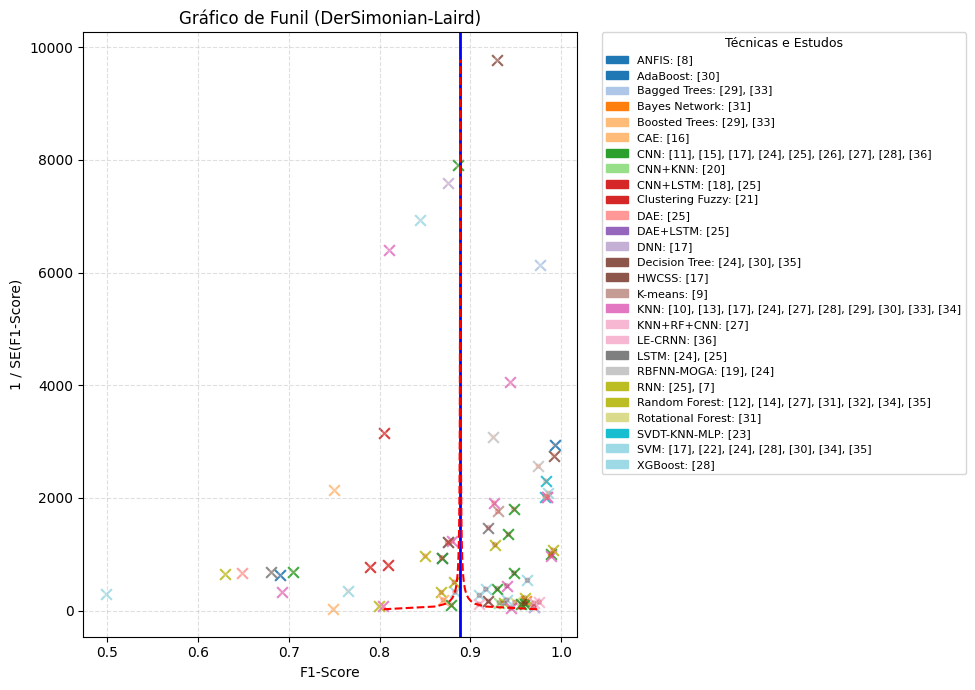

In [137]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from collections import defaultdict
import matplotlib.patches as mpatches
import matplotlib.cm as cm

# Criar diretório para os gráficos
output_dir = "graficos_python_herman"
os.makedirs(output_dir, exist_ok=True)

# Dados (F1 e SE)
f1_scores = [
    0.868, 0.69, 0.93, 0.97, 0.9296, 0.9269, 0.926, 0.85, 0.96, 0.87,
    0.886, 0.845, 0.81, 0.875, 0.929, 0.8093, 0.925, 0.932, 0.805, 0.91,
    0.9821, 0.9831, 0.975, 0.875, 0.88, 0.875, 0.92, 0.948, 0.789, 0.6483,
    0.6297, 0.6806, 0.7047, 0.8685, 0.9421, 0.8685, 0.9093, 0.7994, 0.879, 0.8038,
    0.989, 0.94, 0.917, 0.883, 0.948, 0.692, 0.765, 0.498, 0.9765, 0.9443,
    0.75, 0.992, 0.985, 0.985, 0.993, 0.986, 0.961, 0.949, 0.937, 0.8823,
    0.9701, 0.9446, 0.7487, 0.989, 0.991, 0.963, 0.92, 0.96, 0.94, 0.976,
    0.96, 0.97, 0.956
]

se_f1 = [
    0.003089984, 0.001573434, 0.000568258, 0.015572412, 0.002558199, 0.00085412, 0.000523542,
    0.001030776, 0.007406561, 0.005254741, 0.000126547, 0.000144104, 0.000156207, 0.000131686,
    0.000102263, 0.00124231, 0.000324117, 0.007103422, 0.000317704, 0.003694591, 0.000494126,
    0.000434511, 0.000390312, 0.000826797, 0.000812404, 0.000826797, 0.000678233, 0.000555068,
    0.001290267, 0.00150999, 0.001527016, 0.001474394, 0.00144256, 0.00106868, 0.000738563,
    0.00106868, 0.008763046, 0.012219274, 0.009951418, 0.012117733, 0.000994485, 0.002264348,
    0.002630434, 0.003064622, 0.001496906, 0.003112555, 0.002858599, 0.003370972, 0.000162972,
    0.000246732, 0.000465847, 0.000363685, 0.000496236, 0.000496236, 0.000340367, 0.000479653,
    0.0060826, 0.006912155, 0.007633705, 0.00198785, 0.016946623, 0.022762406, 0.043160799,
    0.001028222, 0.000931002, 0.001860828, 0.0060663, 0.00438178, 0.005310367, 0.006586181,
    0.00843274, 0.007340905, 0.008825888
]

key = [
    "RNN", "ANFIS", "K-means", "KNN", "CNN", "Random Forest", "KNN", "Random Forest", "CNN", "CAE",
    "CNN", "SVM", "KNN", "DNN", "HWCSS", "CNN+LSTM", "RBFNN-MOGA", "CNN+KNN", "Clustering Fuzzy", "SVM",
    "SVDT-KNN-MLP", "SVDT-KNN-MLP", "RBFNN-MOGA", "SVM", "KNN", "Decision Tree", "LSTM", "CNN", "CNN+LSTM", "DAE",
    "RNN", "LSTM", "CNN", "DAE+LSTM", "CNN", "CNN", "KNN+RF+CNN", "Random Forest", "CNN", "KNN",
    "CNN", "KNN", "XGBoost", "SVM", "CNN", "KNN", "XGBoost", "SVM", "Bagged Trees", "KNN",
    "Boosted Trees", "Decision Tree", "KNN", "KNN", "AdaBoost", "SVM", "Bayes Network", "Rotational Forest",
    "Random Forest", "Random Forest", "Bagged Trees", "KNN", "Boosted Trees", "KNN", "Random Forest",
    "SVM", "Decision Tree", "Random Forest", "SVM", "LE-CRNN", "CNN", "LE-CRNN", "CNN"
]

id = [
    "[7]", "[8]", "[9]", "[10]", "[11]", "[12]", "[13]", "[14]", "[15]", "[16]",
    "[17]", "[17]", "[17]", "[17]", "[17]", "[18]", "[19]", "[20]", "[21]", "[22]", "[23]", "[23]",
    "[24]", "[24]", "[24]", "[24]", "[24]", "[24]", "[25]", "[25]", "[25]", "[25]", "[25]", "[25]",
    "[26]", "[26]", "[27]", "[27]", "[27]", "[27]", "[28]", "[28]", "[28]", "[28]", "[28]", "[28]", "[28]", "[28]",
    "[29]", "[29]", "[29]", "[30]", "[30]", "[30]", "[30]", "[30]",
    "[31]", "[31]", "[31]", "[32]",
    "[33]", "[33]", "[33]",
    "[34]", "[34]", "[34]",
    "[35]", "[35]", "[35]",
    "[36]", "[36]", "[36]", "[36]"
]

# Modelo de efeitos aleatórios: DerSimonian-Laird
def calcular_tau2_dl(eff, var_eff):
    k = len(eff)
    weights_fixed = 1 / var_eff
    mean_fixed = np.sum(weights_fixed * eff) / np.sum(weights_fixed)
    Q = np.sum(weights_fixed * (eff - mean_fixed)**2)
    C = np.sum(weights_fixed) - (np.sum(weights_fixed**2) / np.sum(weights_fixed))
    tau2 = max(0, (Q - (k - 1)) / C)
    return tau2

# Meta-análise com efeitos aleatórios (DL)
f1_scores = np.array(f1_scores)
se_f1 = np.array(se_f1)
variancias = se_f1 ** 2

tau2 = calcular_tau2_dl(f1_scores, variancias)
var_total = variancias + tau2
pesos = 1 / var_total

f1_mean_dl = np.sum(pesos * f1_scores) / np.sum(pesos)

# Funnel Plot
precision = 1 / se_f1
plt.figure(figsize=(10, 7))
# Mapear técnica para cor
tecnica_unica = sorted(set(key))
cmap = cm.get_cmap('tab20', len(tecnica_unica))
cor_por_tecnica = {tec: cmap(i) for i, tec in enumerate(tecnica_unica)}

# Plotar cada ponto com a cor de sua técnica
for i in range(len(f1_scores)):
    plt.scatter(f1_scores[i], precision[i],
                color=cor_por_tecnica[key[i]],
                edgecolor='black',
                alpha=0.9,
                label=key[i] if key[i] not in key[:i] else "",  # evitar duplicata na legenda
                s=60,
                marker='x')

# Linha azul: efeito combinado (DL)
plt.axvline(f1_mean_dl, color='blue', linestyle='-', linewidth=2,
            label=f'F1 Médio Observado = {f1_mean_dl:.4f}')

# Contornos do funil (95%)
prec_range = np.linspace(min(precision), max(precision), 200)
se_range = 1 / prec_range
ci_upper = f1_mean_dl + 1.96 * se_range
ci_lower = f1_mean_dl - 1.96 * se_range
plt.plot(ci_upper, prec_range, 'r--')
plt.plot(ci_lower, prec_range, 'r--')

# Densidade (opcional, em segundo plano para não cobrir pontos)
xy = np.vstack([f1_scores, precision])
kde = gaussian_kde(xy)(xy)
plt.scatter(f1_scores, precision, c=kde, cmap='Reds', s=10, alpha=0.2)

# Criar legenda com cor por técnica e estudos
tecnica_ids = defaultdict(set)
for t, i in zip(key, id):
    tecnica_ids[t].add(i)

legend_handles = []
for idx, (tecnica, ids_set) in enumerate(sorted(tecnica_ids.items())):
    legenda = f"{tecnica}: {', '.join(sorted(ids_set))}"
    patch = mpatches.Patch(color=cor_por_tecnica[tecnica], label=legenda)
    legend_handles.append(patch)

plt.legend(
    handles=legend_handles,
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0.,
    fontsize=8,
    title="Técnicas e Estudos",
    title_fontsize=9
)

plt.xlabel("F1-Score")
plt.ylabel("1 / SE(F1-Score)")
plt.title("Gráfico de Funil (DerSimonian-Laird)")
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()

# Salvar
plt.savefig(os.path.join(output_dir, "funnel_plot_f1_por_tecnica.png"), dpi=300, bbox_inches="tight")
plt.show()

**Gráfico de Distribuição Fscore**

<Figure size 1200x600 with 0 Axes>

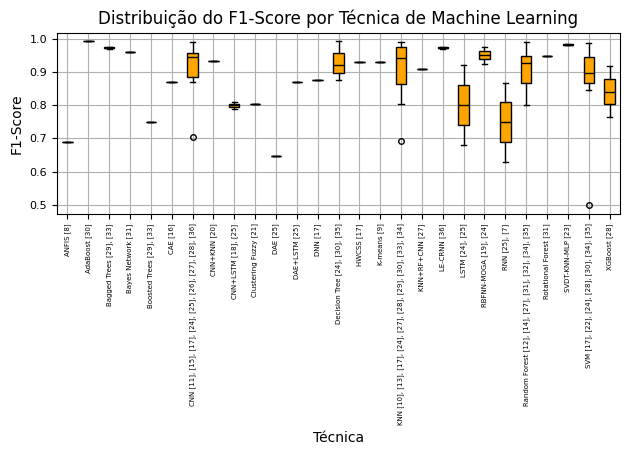

In [119]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Criar diretório para os gráficos
output_dir = "graficos_python_herman"
os.makedirs(output_dir, exist_ok=True)

# Dados originais
fscore = [
    0.868, 0.69, 0.93, 0.97, 0.9296, 0.9269, 0.926, 0.85, 0.96, 0.87,
    0.886, 0.845, 0.81, 0.875, 0.929, 0.8093, 0.925, 0.932, 0.805, 0.91,
    0.9821, 0.9831, 0.975, 0.875, 0.88, 0.875, 0.92, 0.948, 0.789, 0.6483,
    0.6297, 0.6806, 0.7047, 0.8685, 0.9421, 0.8685, 0.9093, 0.7994, 0.879, 0.8038,
    0.989, 0.94, 0.917, 0.883, 0.948, 0.692, 0.765, 0.498, 0.9765, 0.9443,
    0.75, 0.992, 0.985, 0.985, 0.993, 0.986, 0.961, 0.949, 0.937, 0.8823,
    0.9701, 0.9446, 0.7487, 0.989, 0.991, 0.963, 0.92, 0.96, 0.94, 0.976,
    0.96, 0.97, 0.956
]

se_fscore = [
    0.003089984, 0.001573434, 0.000568258, 0.015572412, 0.002558199, 0.00085412, 0.000523542,
    0.001030776, 0.007406561, 0.005254741, 0.000126547, 0.000144104, 0.000156207, 0.000131686,
    0.000102263, 0.00124231, 0.000324117, 0.007103422, 0.000317704, 0.003694591, 0.000494126,
    0.000434511, 0.000390312, 0.000826797, 0.000812404, 0.000826797, 0.000678233, 0.000555068,
    0.001290267, 0.00150999, 0.001527016, 0.001474394, 0.00144256, 0.00106868, 0.000738563,
    0.00106868, 0.008763046, 0.012219274, 0.009951418, 0.012117733, 0.000994485, 0.002264348,
    0.002630434, 0.003064622, 0.001496906, 0.003112555, 0.002858599, 0.003370972, 0.000162972,
    0.000246732, 0.000465847, 0.000363685, 0.000496236, 0.000496236, 0.000340367, 0.000479653,
    0.0060826, 0.006912155, 0.007633705, 0.00198785, 0.016946623, 0.022762406, 0.043160799,
    0.001028222, 0.000931002, 0.001860828, 0.0060663, 0.00438178, 0.005310367, 0.006586181,
    0.00843274, 0.007340905, 0.008825888
]

key = [
    "RNN", "ANFIS", "K-means", "KNN", "CNN", "Random Forest", "KNN", "Random Forest", "CNN", "CAE",
    "CNN", "SVM", "KNN", "DNN", "HWCSS", "CNN+LSTM", "RBFNN-MOGA", "CNN+KNN", "Clustering Fuzzy", "SVM",
    "SVDT-KNN-MLP", "SVDT-KNN-MLP", "RBFNN-MOGA", "SVM", "KNN", "Decision Tree", "LSTM", "CNN", "CNN+LSTM", "DAE",
    "RNN", "LSTM", "CNN", "DAE+LSTM", "CNN", "CNN", "KNN+RF+CNN", "Random Forest", "CNN", "KNN",
    "CNN", "KNN", "XGBoost", "SVM", "CNN", "KNN", "XGBoost", "SVM", "Bagged Trees", "KNN",
    "Boosted Trees", "Decision Tree", "KNN", "KNN", "AdaBoost", "SVM", "Bayes Network", "Rotational Forest",
    "Random Forest", "Random Forest", "Bagged Trees", "KNN", "Boosted Trees", "KNN", "Random Forest",
    "SVM", "Decision Tree", "Random Forest", "SVM", "LE-CRNN", "CNN", "LE-CRNN", "CNN"
]

id = [
    "[7]", "[8]", "[9]", "[10]", "[11]", "[12]", "[13]", "[14]", "[15]", "[16]",
    "[17]", "[17]", "[17]", "[17]", "[17]", "[18]", "[19]", "[20]", "[21]", "[22]", "[23]", "[23]",
    "[24]", "[24]", "[24]", "[24]", "[24]", "[24]", "[25]", "[25]", "[25]", "[25]", "[25]", "[25]",
    "[26]", "[26]", "[27]", "[27]", "[27]", "[27]", "[28]", "[28]", "[28]", "[28]", "[28]", "[28]", "[28]", "[28]",
    "[29]", "[29]", "[29]", "[30]", "[30]", "[30]", "[30]", "[30]",
    "[31]", "[31]", "[31]", "[32]",
    "[33]", "[33]", "[33]",
    "[34]", "[34]", "[34]",
    "[35]", "[35]", "[35]",
    "[36]", "[36]", "[36]", "[36]"
]

# Exemplo de dados (substitua pelos seus)
df = pd.DataFrame({
    'tecnica': key,
    'f1': fscore,
    'ids': id
})

# Criar mapeamento de técnica para IDs únicos
tecnica_id_map = df.groupby('tecnica')['ids'].apply(lambda x: ', '.join(sorted(set(x)))).to_dict()

# Criar coluna no df com técnica + IDs únicos
df['tecnica_id'] = df['tecnica'].map(lambda t: f"{t} {tecnica_id_map[t]}")

# Criar o boxplot com caixas amarelas
plt.figure(figsize=(12, 6))
box = df.boxplot(column='f1', by='tecnica_id', grid=True, patch_artist=True,
                 boxprops=dict(facecolor='orange', color='black'),
                 medianprops=dict(color='black'),
                 flierprops=dict(marker='o', color='black', markersize=4, linestyle='none'),
                 whiskerprops=dict(color='black'),
                 capprops=dict(color='black'))

# Ajustes visuais
plt.title('Distribuição do F1-Score por Técnica de Machine Learning')
plt.suptitle('')  # remove título automático do pandas
plt.xlabel('Técnica')
plt.ylabel('F1-Score')
plt.xticks(rotation=90,fontsize=5)
plt.yticks(fontsize=8)
plt.tight_layout()

# Salvar figura
path = os.path.join(output_dir, "Gráfico de Distribuição do F1-Score por Técnica de Machine Learning.png")
plt.savefig(path, dpi=300, bbox_inches='tight')
plt.show()


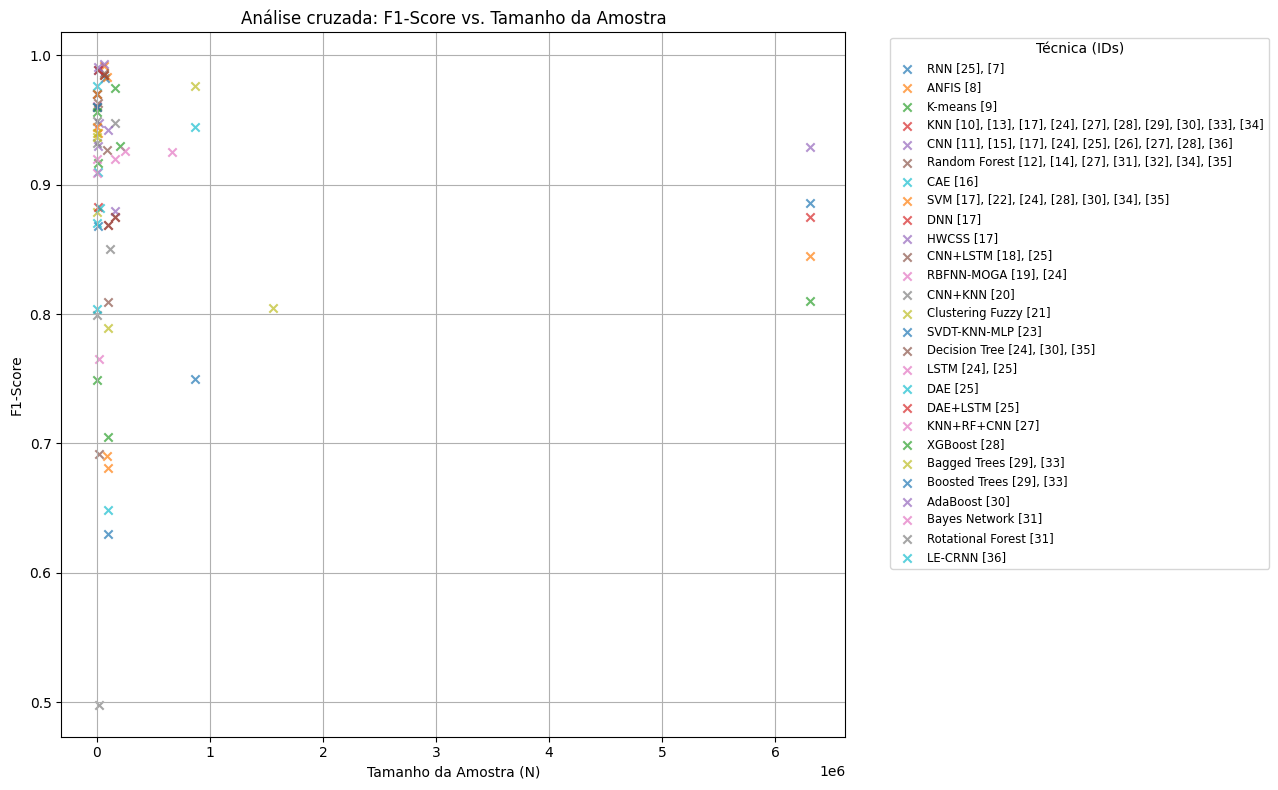

In [128]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Criar diretório para os gráficos
output_dir = "graficos_python_herman"
os.makedirs(output_dir, exist_ok=True)

# Dados originais
fscore = [
    0.868, 0.69, 0.93, 0.97, 0.9296, 0.9269, 0.926, 0.85, 0.96, 0.87,
    0.886, 0.845, 0.81, 0.875, 0.929, 0.8093, 0.925, 0.932, 0.805, 0.91,
    0.9821, 0.9831, 0.975, 0.875, 0.88, 0.875, 0.92, 0.948, 0.789, 0.6483,
    0.6297, 0.6806, 0.7047, 0.8685, 0.9421, 0.8685, 0.9093, 0.7994, 0.879, 0.8038,
    0.989, 0.94, 0.917, 0.883, 0.948, 0.692, 0.765, 0.498, 0.9765, 0.9443,
    0.75, 0.992, 0.985, 0.985, 0.993, 0.986, 0.961, 0.949, 0.937, 0.8823,
    0.9701, 0.9446, 0.7487, 0.989, 0.991, 0.963, 0.92, 0.96, 0.94, 0.976,
    0.96, 0.97, 0.956
]

se_fscore = [
    0.003089984, 0.001573434, 0.000568258, 0.015572412, 0.002558199, 0.00085412, 0.000523542,
    0.001030776, 0.007406561, 0.005254741, 0.000126547, 0.000144104, 0.000156207, 0.000131686,
    0.000102263, 0.00124231, 0.000324117, 0.007103422, 0.000317704, 0.003694591, 0.000494126,
    0.000434511, 0.000390312, 0.000826797, 0.000812404, 0.000826797, 0.000678233, 0.000555068,
    0.001290267, 0.00150999, 0.001527016, 0.001474394, 0.00144256, 0.00106868, 0.000738563,
    0.00106868, 0.008763046, 0.012219274, 0.009951418, 0.012117733, 0.000994485, 0.002264348,
    0.002630434, 0.003064622, 0.001496906, 0.003112555, 0.002858599, 0.003370972, 0.000162972,
    0.000246732, 0.000465847, 0.000363685, 0.000496236, 0.000496236, 0.000340367, 0.000479653,
    0.0060826, 0.006912155, 0.007633705, 0.00198785, 0.016946623, 0.022762406, 0.043160799,
    0.001028222, 0.000931002, 0.001860828, 0.0060663, 0.00438178, 0.005310367, 0.006586181,
    0.00843274, 0.007340905, 0.008825888
]

key = [
    "RNN", "ANFIS", "K-means", "KNN", "CNN", "Random Forest", "KNN", "Random Forest", "CNN", "CAE",
    "CNN", "SVM", "KNN", "DNN", "HWCSS", "CNN+LSTM", "RBFNN-MOGA", "CNN+KNN", "Clustering Fuzzy", "SVM",
    "SVDT-KNN-MLP", "SVDT-KNN-MLP", "RBFNN-MOGA", "SVM", "KNN", "Decision Tree", "LSTM", "CNN", "CNN+LSTM", "DAE",
    "RNN", "LSTM", "CNN", "DAE+LSTM", "CNN", "CNN", "KNN+RF+CNN", "Random Forest", "CNN", "KNN",
    "CNN", "KNN", "XGBoost", "SVM", "CNN", "KNN", "XGBoost", "SVM", "Bagged Trees", "KNN",
    "Boosted Trees", "Decision Tree", "KNN", "KNN", "AdaBoost", "SVM", "Bayes Network", "Rotational Forest",
    "Random Forest", "Random Forest", "Bagged Trees", "KNN", "Boosted Trees", "KNN", "Random Forest",
    "SVM", "Decision Tree", "Random Forest", "SVM", "LE-CRNN", "CNN", "LE-CRNN", "CNN"
]

tamanho_amostra = [
    12000, 86400, 201600, 120, 10000, 92878, 250000, 120000, 700, 4096,
    6307200, 6307200, 6307200, 6307200, 6307200, 100000, 660390, 1256, 1555200,
    6000, 72000, 88000, 160000, 160000, 160000, 160000, 160000, 160000, 100000,
    100000, 100000, 100000, 100000, 100000, 100000, 100000, 1074, 1074, 1074,
    1074, 11000, 11000, 11000, 11000, 22000, 22000, 22000, 22000, 864000, 864000,
    864000, 60000, 60000, 60000, 60000, 60000, 1013, 1013, 1013, 26280, 101, 101,
    101, 10290, 10290, 10290, 2000, 2000, 2000, 540, 540, 540, 540
]

id = [
    "[7]", "[8]", "[9]", "[10]", "[11]", "[12]", "[13]", "[14]", "[15]", "[16]",
    "[17]", "[17]", "[17]", "[17]", "[17]", "[18]", "[19]", "[20]", "[21]", "[22]", "[23]", "[23]",
    "[24]", "[24]", "[24]", "[24]", "[24]", "[24]", "[25]", "[25]", "[25]", "[25]", "[25]", "[25]",
    "[26]", "[26]", "[27]", "[27]", "[27]", "[27]", "[28]", "[28]", "[28]", "[28]", "[28]", "[28]", "[28]", "[28]",
    "[29]", "[29]", "[29]", "[30]", "[30]", "[30]", "[30]", "[30]",
    "[31]", "[31]", "[31]", "[32]",
    "[33]", "[33]", "[33]",
    "[34]", "[34]", "[34]",
    "[35]", "[35]", "[35]",
    "[36]", "[36]", "[36]", "[36]"
]


# Criar DataFrame
df = pd.DataFrame({
    'Tamanho da Amostra': tamanho_amostra,
    'F1-Score': fscore,
    'Algoritmo': key,
    'ids': id
})

# Criar mapeamento de técnica para IDs únicos e ordenados
tecnica_id_map = df.groupby('Algoritmo')['ids'].apply(lambda x: ', '.join(sorted(set(x)))).to_dict()

# Criar coluna combinada "Técnica + IDs"
df['tecnica_id'] = df['Algoritmo'].map(lambda t: f"{t} {tecnica_id_map[t]}")

# Plot
plt.figure(figsize=(13, 8))

# Para evitar duplicação na legenda
plot_labels = set()

# Plotar cada ponto com técnica+IDs como rótulo único
for _, row in df.iterrows():
    label = row['tecnica_id']
    if label not in plot_labels:
        plt.scatter(row['Tamanho da Amostra'], row['F1-Score'], label=label, alpha=0.7, marker='x')
        plot_labels.add(label)
    else:
        plt.scatter(row['Tamanho da Amostra'], row['F1-Score'], alpha=0.7, marker='x')

plt.title('Análise cruzada: F1-Score vs. Tamanho da Amostra')
plt.xlabel('Tamanho da Amostra (N)')
plt.ylabel('F1-Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small', title="Técnica (IDs)")
plt.grid(True)
plt.tight_layout()

# Salvar figura
path = os.path.join(output_dir, "Grafico_F1Score_vs_TamanhoAmostra_com_IDs.png")
plt.savefig(path, dpi=300, bbox_inches='tight')
plt.show()

**Gráfico de calor** - Tamanho N de amostras

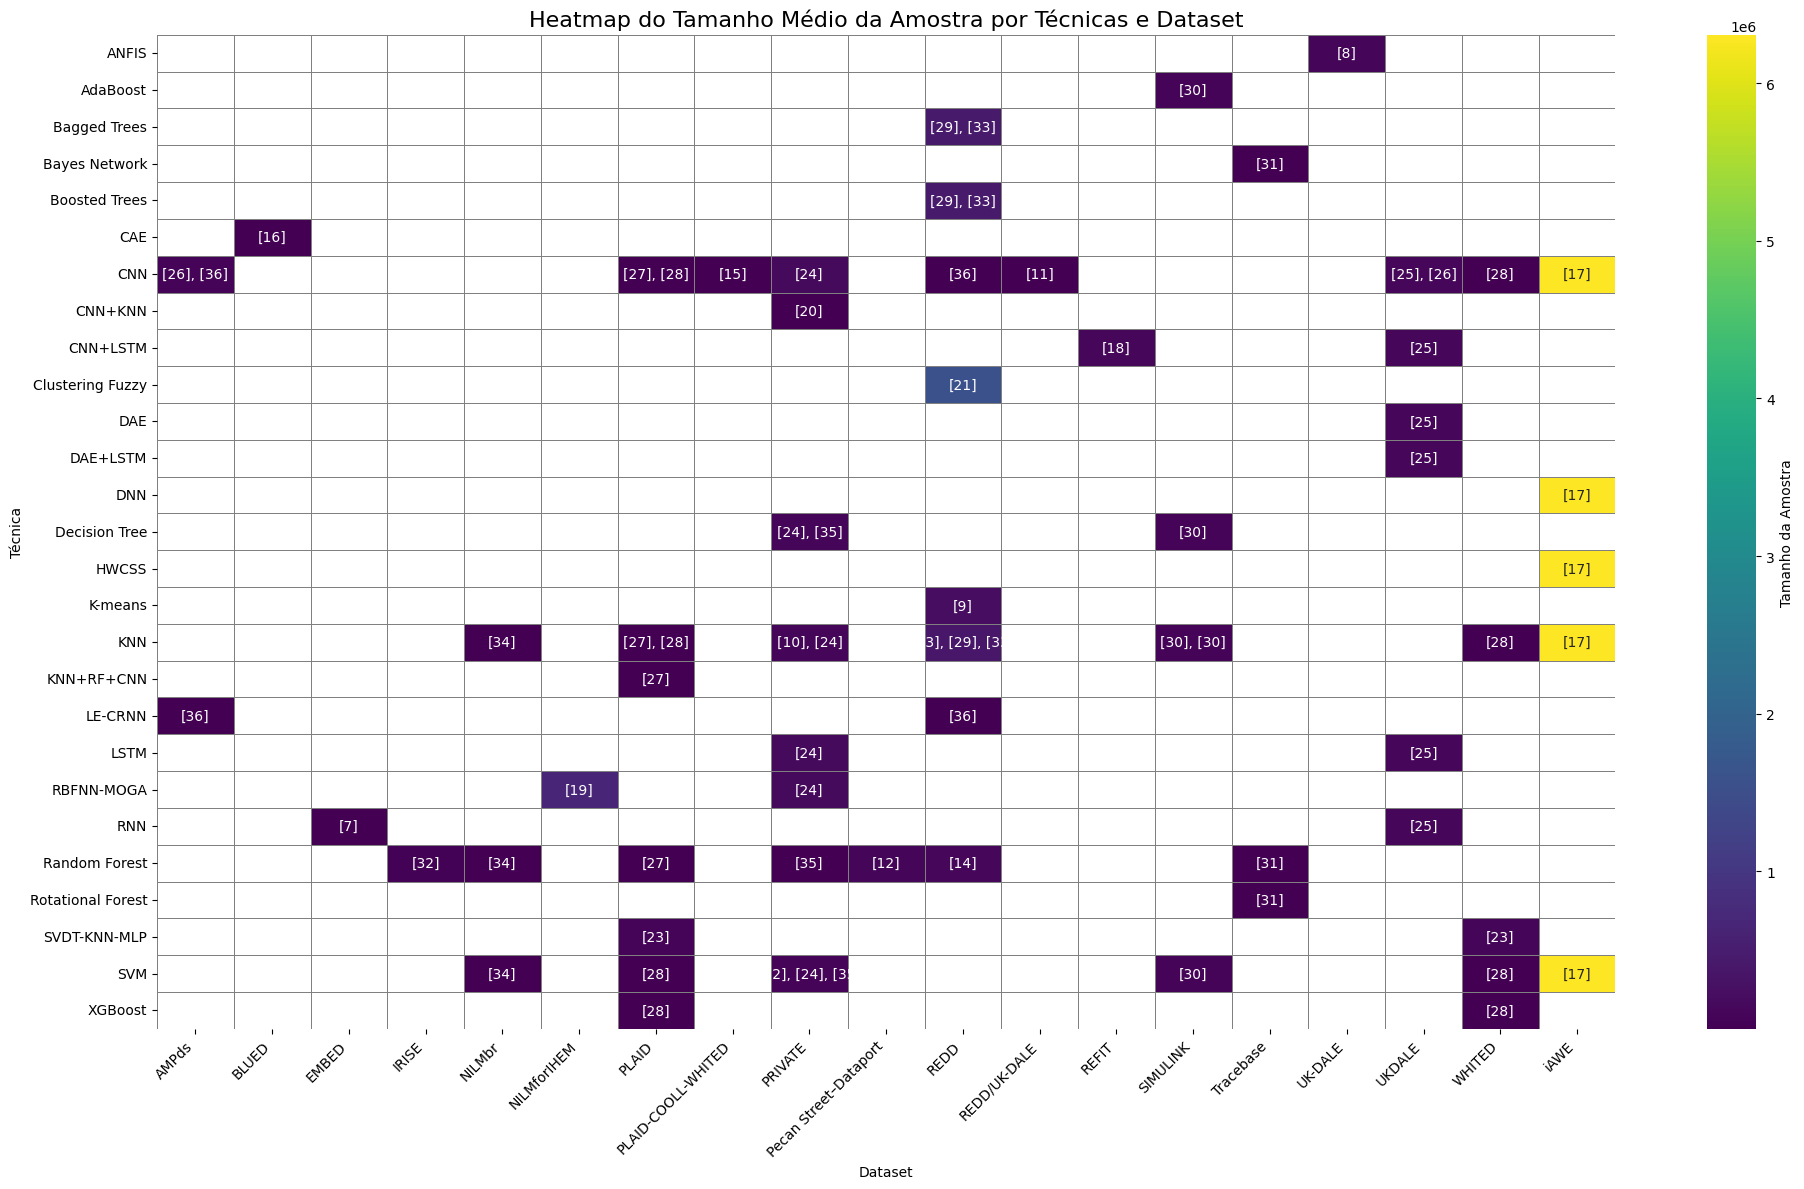

In [132]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Criar diretório para os gráficos
output_dir = "graficos_python_herman"
os.makedirs(output_dir, exist_ok=True)

# Dados fornecidos
keys = [
    "A1", "A2", "A3", "A4", "A5", "A6", "A7", "A8", "A9", "A10", "A11", "A11", "A11", "A11", "A11",
    "A12", "A13", "A14", "A15", "A16", "A17", "A17", "A18", "A18", "A18", "A18", "A18", "A18", "A19",
    "A19", "A19", "A19", "A19", "A19", "A20", "A20", "A21", "A21", "A21", "A21", "A22", "A22", "A22",
    "A22", "A22", "A22", "A22", "A22", "A23", "A23", "A23", "A24", "A24", "A24", "A24", "A24", "A25",
    "A25", "A25", "A26", "A27", "A27", "A27", "A28", "A28", "A28", "A29", "A29", "A29", "A30", "A30",
    "A30", "A30"
]

study = [
    "RNN", "ANFIS", "K-means", "KNN", "CNN", "Random Forest", "KNN", "Random Forest", "CNN", "CAE",
    "CNN", "SVM", "KNN", "DNN", "HWCSS", "CNN+LSTM", "RBFNN-MOGA", "CNN+KNN", "Clustering Fuzzy", "SVM",
    "SVDT-KNN-MLP", "SVDT-KNN-MLP", "RBFNN-MOGA", "SVM", "KNN", "Decision Tree", "LSTM", "CNN", "CNN+LSTM", "DAE",
    "RNN", "LSTM", "CNN", "DAE+LSTM", "CNN", "CNN", "KNN+RF+CNN", "Random Forest", "CNN", "KNN",
    "CNN", "KNN", "XGBoost", "SVM", "CNN", "KNN", "XGBoost", "SVM", "Bagged Trees", "KNN",
    "Boosted Trees", "Decision Tree", "KNN", "KNN", "AdaBoost", "SVM", "Bayes Network", "Rotational Forest",
    "Random Forest", "Random Forest", "Bagged Trees", "KNN", "Boosted Trees", "KNN", "Random Forest",
    "SVM", "Decision Tree", "Random Forest", "SVM", "LE-CRNN", "CNN", "LE-CRNN", "CNN"
]

tamanho_amostra = [
    12000, 86400, 201600, 120, 10000, 92878, 250000, 120000, 700, 4096,
    6307200, 6307200, 6307200, 6307200, 6307200, 100000, 660390, 1256, 1555200,
    6000, 72000, 88000, 160000, 160000, 160000, 160000, 160000, 160000, 100000,
    100000, 100000, 100000, 100000, 100000, 100000, 100000, 1074, 1074, 1074,
    1074, 11000, 11000, 11000, 11000, 22000, 22000, 22000, 22000, 864000, 864000,
    864000, 60000, 60000, 60000, 60000, 60000, 1013, 1013, 1013, 26280, 101, 101,
    101, 10290, 10290, 10290, 2000, 2000, 2000, 540, 540, 540, 540
]

datasets = [
    "EMBED", "UK-DALE", "REDD", "PRIVATE", "REDD/UK-DALE", "Pecan Street–Dataport", "REDD", "REDD",
    "PLAID-COOLL-WHITED", "BLUED", "iAWE", "iAWE", "iAWE", "iAWE", "iAWE", "REFIT", "NILMforIHEM",
    "PRIVATE", "REDD", "PRIVATE", "PLAID", "WHITED", "PRIVATE", "PRIVATE", "PRIVATE", "PRIVATE",
    "PRIVATE", "PRIVATE", "UKDALE", "UKDALE", "UKDALE", "UKDALE", "UKDALE", "UKDALE", "AMPds",
    "UKDALE", "PLAID", "PLAID", "PLAID", "PLAID", "WHITED", "WHITED", "WHITED", "WHITED", "PLAID",
    "PLAID", "PLAID", "PLAID", "REDD", "REDD", "REDD", "SIMULINK", "SIMULINK", "SIMULINK",
    "SIMULINK", "SIMULINK", "Tracebase", "Tracebase", "Tracebase", "IRISE", "REDD", "REDD", "REDD",
    "NILMbr", "NILMbr", "NILMbr", "PRIVATE", "PRIVATE", "PRIVATE", "REDD", "REDD", "AMPds", "AMPds"
]

id = [
    "[7]", "[8]", "[9]", "[10]", "[11]", "[12]", "[13]", "[14]", "[15]", "[16]",
    "[17]", "[17]", "[17]", "[17]", "[17]", "[18]", "[19]", "[20]", "[21]", "[22]", "[23]", "[23]",
    "[24]", "[24]", "[24]", "[24]", "[24]", "[24]", "[25]", "[25]", "[25]", "[25]", "[25]", "[25]",
    "[26]", "[26]", "[27]", "[27]", "[27]", "[27]", "[28]", "[28]", "[28]", "[28]", "[28]", "[28]", "[28]", "[28]",
    "[29]", "[29]", "[29]", "[30]", "[30]", "[30]", "[30]", "[30]",
    "[31]", "[31]", "[31]", "[32]",
    "[33]", "[33]", "[33]",
    "[34]", "[34]", "[34]",
    "[35]", "[35]", "[35]",
    "[36]", "[36]", "[36]", "[36]"
]

# Criar DataFrame
df = pd.DataFrame({
    "Key": id,
    "Dataset": datasets,
    "Technique": study,
    "SampleSize": tamanho_amostra
})

# Tabela pivot com valores de chave como anotações e SampleSize como cor
pivot_table = df.pivot_table(
    index="Technique", columns="Dataset", values="SampleSize", aggfunc="mean"
)

# Tabela de anotação (Key)
annotation_table = df.pivot_table(
    index="Technique", columns="Dataset", values="Key", aggfunc=lambda x: ', '.join(x)
)

# Criar o heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(
    pivot_table,
    annot=annotation_table,
    fmt='',
    cmap='viridis',
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'label': 'Tamanho da Amostra'}
)

plt.title("Heatmap do Tamanho Médio da Amostra por Técnicas e Dataset", fontsize=16)
plt.xlabel("Dataset")
plt.ylabel("Técnica")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


# Salvar figura
path = os.path.join(output_dir, "viridis_Heatmap do Tamanho Médio da Amostra por Técnicas e Dataset.png")
plt.savefig(path, dpi=300, bbox_inches='tight')
plt.show()

**Gráfico de calor** - Métrica Fscore

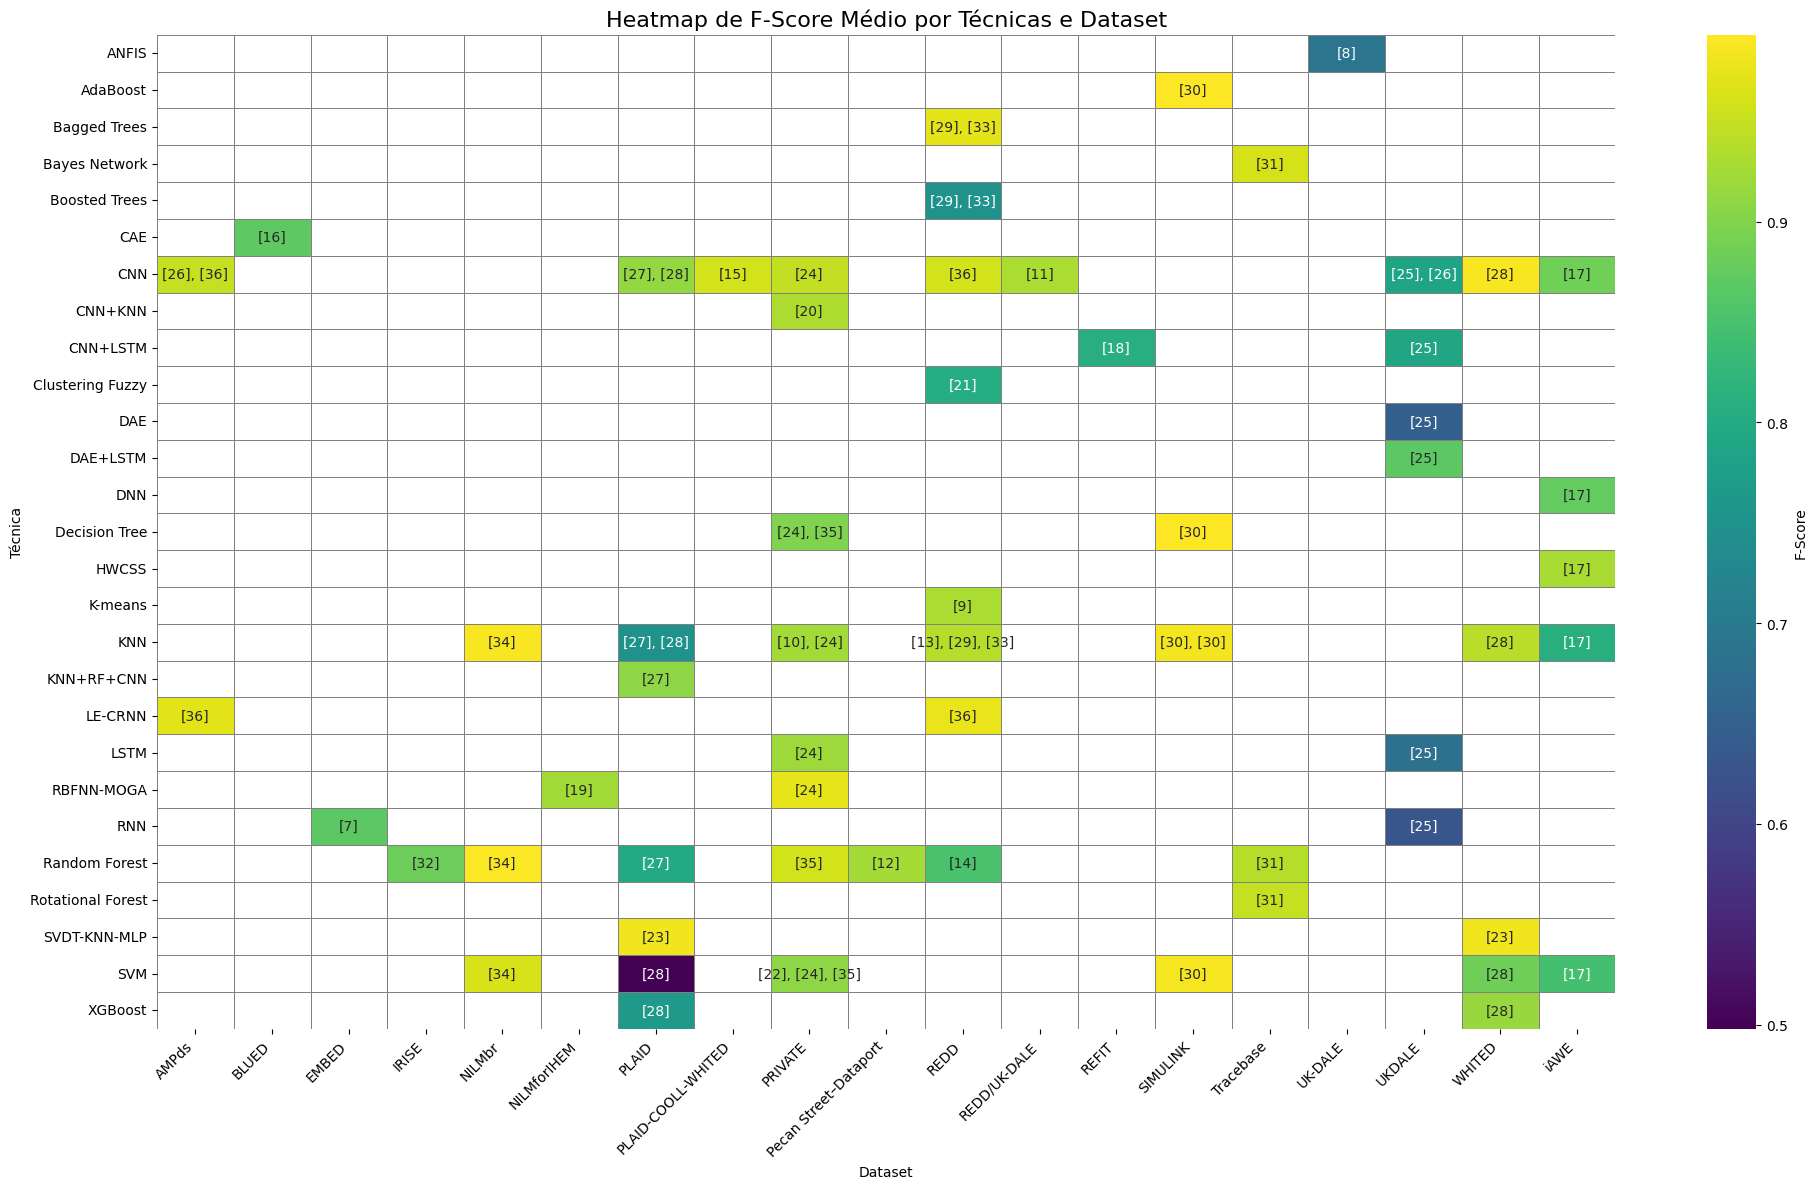

In [133]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Criar diretório para os gráficos
output_dir = "graficos_python_herman"
os.makedirs(output_dir, exist_ok=True)

# Dados originais
fscore = [
    0.868, 0.69, 0.93, 0.97, 0.9296, 0.9269, 0.926, 0.85, 0.96, 0.87,
    0.886, 0.845, 0.81, 0.875, 0.929, 0.8093, 0.925, 0.932, 0.805, 0.91,
    0.9821, 0.9831, 0.975, 0.875, 0.88, 0.875, 0.92, 0.948, 0.789, 0.6483,
    0.6297, 0.6806, 0.7047, 0.8685, 0.9421, 0.8685, 0.9093, 0.7994, 0.879, 0.8038,
    0.989, 0.94, 0.917, 0.883, 0.948, 0.692, 0.765, 0.498, 0.9765, 0.9443,
    0.75, 0.992, 0.985, 0.985, 0.993, 0.986, 0.961, 0.949, 0.937, 0.8823,
    0.9701, 0.9446, 0.7487, 0.989, 0.991, 0.963, 0.92, 0.96, 0.94, 0.976,
    0.96, 0.97, 0.956
]

keys = [
    "A1", "A2", "A3", "A4", "A5", "A6", "A7", "A8", "A9", "A10", "A11", "A11", "A11", "A11", "A11",
    "A12", "A13", "A14", "A15", "A16", "A17", "A17", "A18", "A18", "A18", "A18", "A18", "A18", "A19",
    "A19", "A19", "A19", "A19", "A19", "A20", "A20", "A21", "A21", "A21", "A21", "A22", "A22", "A22",
    "A22", "A22", "A22", "A22", "A22", "A23", "A23", "A23", "A24", "A24", "A24", "A24", "A24", "A25",
    "A25", "A25", "A26", "A27", "A27", "A27", "A28", "A28", "A28", "A29", "A29", "A29", "A30", "A30",
    "A30", "A30"
]

study = [
    "RNN", "ANFIS", "K-means", "KNN", "CNN", "Random Forest", "KNN", "Random Forest", "CNN", "CAE",
    "CNN", "SVM", "KNN", "DNN", "HWCSS", "CNN+LSTM", "RBFNN-MOGA", "CNN+KNN", "Clustering Fuzzy", "SVM",
    "SVDT-KNN-MLP", "SVDT-KNN-MLP", "RBFNN-MOGA", "SVM", "KNN", "Decision Tree", "LSTM", "CNN", "CNN+LSTM", "DAE",
    "RNN", "LSTM", "CNN", "DAE+LSTM", "CNN", "CNN", "KNN+RF+CNN", "Random Forest", "CNN", "KNN",
    "CNN", "KNN", "XGBoost", "SVM", "CNN", "KNN", "XGBoost", "SVM", "Bagged Trees", "KNN",
    "Boosted Trees", "Decision Tree", "KNN", "KNN", "AdaBoost", "SVM", "Bayes Network", "Rotational Forest",
    "Random Forest", "Random Forest", "Bagged Trees", "KNN", "Boosted Trees", "KNN", "Random Forest",
    "SVM", "Decision Tree", "Random Forest", "SVM", "LE-CRNN", "CNN", "LE-CRNN", "CNN"
]

datasets = [
    "EMBED", "UK-DALE", "REDD", "PRIVATE", "REDD/UK-DALE", "Pecan Street–Dataport", "REDD", "REDD",
    "PLAID-COOLL-WHITED", "BLUED", "iAWE", "iAWE", "iAWE", "iAWE", "iAWE", "REFIT", "NILMforIHEM",
    "PRIVATE", "REDD", "PRIVATE", "PLAID", "WHITED", "PRIVATE", "PRIVATE", "PRIVATE", "PRIVATE",
    "PRIVATE", "PRIVATE", "UKDALE", "UKDALE", "UKDALE", "UKDALE", "UKDALE", "UKDALE", "AMPds",
    "UKDALE", "PLAID", "PLAID", "PLAID", "PLAID", "WHITED", "WHITED", "WHITED", "WHITED", "PLAID",
    "PLAID", "PLAID", "PLAID", "REDD", "REDD", "REDD", "SIMULINK", "SIMULINK", "SIMULINK",
    "SIMULINK", "SIMULINK", "Tracebase", "Tracebase", "Tracebase", "IRISE", "REDD", "REDD", "REDD",
    "NILMbr", "NILMbr", "NILMbr", "PRIVATE", "PRIVATE", "PRIVATE", "REDD", "REDD", "AMPds", "AMPds"
]

id = [
    "[7]", "[8]", "[9]", "[10]", "[11]", "[12]", "[13]", "[14]", "[15]", "[16]",
    "[17]", "[17]", "[17]", "[17]", "[17]", "[18]", "[19]", "[20]", "[21]", "[22]", "[23]", "[23]",
    "[24]", "[24]", "[24]", "[24]", "[24]", "[24]", "[25]", "[25]", "[25]", "[25]", "[25]", "[25]",
    "[26]", "[26]", "[27]", "[27]", "[27]", "[27]", "[28]", "[28]", "[28]", "[28]", "[28]", "[28]", "[28]", "[28]",
    "[29]", "[29]", "[29]", "[30]", "[30]", "[30]", "[30]", "[30]",
    "[31]", "[31]", "[31]", "[32]",
    "[33]", "[33]", "[33]",
    "[34]", "[34]", "[34]",
    "[35]", "[35]", "[35]",
    "[36]", "[36]", "[36]", "[36]"
]

# Criar DataFrame
df = pd.DataFrame({
    "Key": id,
    "Dataset": datasets,
    "Technique": study,
    "Fscore": fscore
})

# Tabela pivot com valores de chave como anotações e SampleSize como cor
pivot_table = df.pivot_table(
    index="Technique", columns="Dataset", values="Fscore", aggfunc="mean"
)

# Tabela de anotação (Key)
annotation_table = df.pivot_table(
    index="Technique", columns="Dataset", values="Key", aggfunc=lambda x: ', '.join(x)
)

# Criar o heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(
    pivot_table,
    annot=annotation_table,
    fmt='',
    cmap='viridis',
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'label': 'F-Score'}
)

plt.title("Heatmap de F-Score Médio por Técnicas e Dataset", fontsize=16)
plt.xlabel("Dataset")
plt.ylabel("Técnica")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Salvar figura
path = os.path.join(output_dir, "viridis_Heatmap de F-Score Médio por Técnicas e Dataset.png")
plt.savefig(path, dpi=300, bbox_inches='tight')
plt.show()
